In [6]:
from pathlib import Path
BASE_DIR = Path().resolve()
import sys
sys.path.append(str(BASE_DIR.parent / 'scr'))

from dataset_generator import variables, generar_dataset

In [7]:
Nx = 50
Ny = 50
dx = 0.05
dy = 0.05

generar_dataset(50000, Nx, Ny, dx, dy,'dataset_50000_test')

Se tienen 0/50000 muestras generadas.
Se tienen 50/50000 muestras generadas.
Se tienen 100/50000 muestras generadas.
Se tienen 150/50000 muestras generadas.
Se tienen 200/50000 muestras generadas.
Se tienen 250/50000 muestras generadas.
Se tienen 300/50000 muestras generadas.
Se tienen 350/50000 muestras generadas.
Se tienen 400/50000 muestras generadas.
Se tienen 450/50000 muestras generadas.
Se tienen 500/50000 muestras generadas.
Se tienen 550/50000 muestras generadas.
Se tienen 600/50000 muestras generadas.
Se tienen 650/50000 muestras generadas.
Se tienen 700/50000 muestras generadas.
Se tienen 750/50000 muestras generadas.
Se tienen 800/50000 muestras generadas.
Se tienen 850/50000 muestras generadas.
Se tienen 900/50000 muestras generadas.
Se tienen 950/50000 muestras generadas.
Se tienen 1000/50000 muestras generadas.
Se tienen 1050/50000 muestras generadas.
Se tienen 1100/50000 muestras generadas.
Se tienen 1150/50000 muestras generadas.
Se tienen 1200/50000 muestras generadas

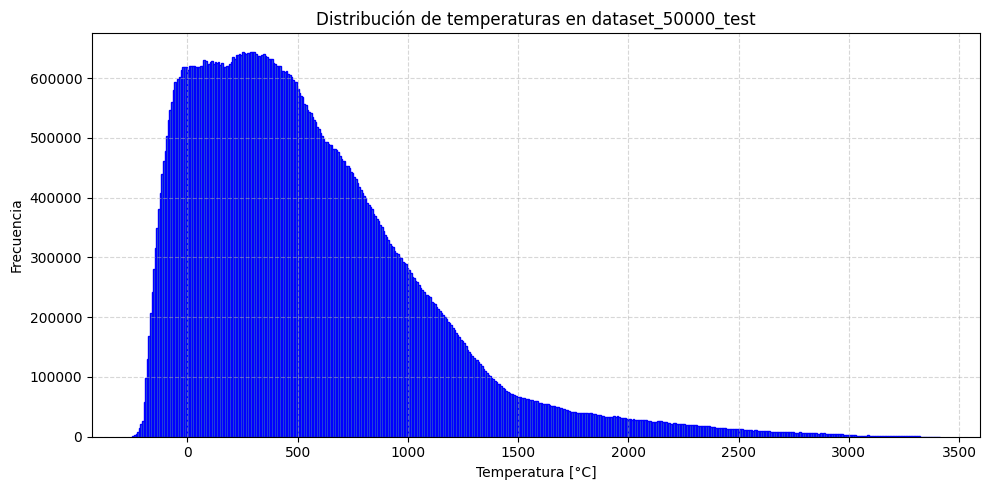

Estadísticas generales de dataset_50000_test:
Temperatura mínima: -249.91 °C
Temperatura máxima: 3411.47 °C
Temperatura media: 541.12 °C
Temperatura std: 515.43 °C

Mostrando muestras más cercanas a los valores promedio del dataset:

Muestra más cercana por temperatura mínima promedio en índice: 31583
Temperatura mínima: 148.89 °C
Temperatura máxima: 1071.29 °C
Temperatura media: 477.26 °C
Temperatura std: 137.24 °C

Condiciones de borde y material de la muestra:


material    Steel - Nickel, 60% Ni
k                             19.0
T_fusion                    1450.0
T_hp                      1071.286
i_hp                            25
j_hp                            31
tipo_A                        temp
tipo_B                         flu
tipo_C                         flu
tipo_D                        temp
valor_A                    148.891
valor_B                   4705.048
valor_C                  -8495.373
valor_D                    660.445
Name: 31583, dtype: object

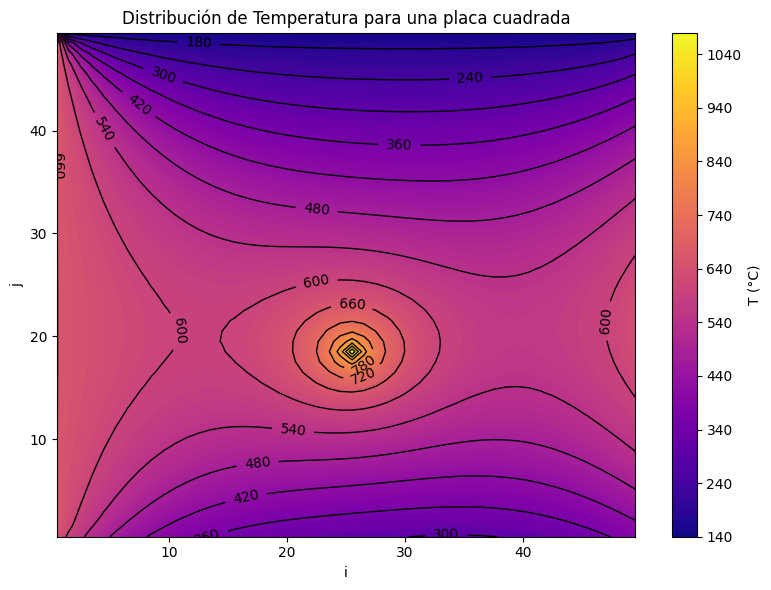


Muestra más cercana por temperatura máxima promedio en índice: 39585
Temperatura mínima: 674.06 °C
Temperatura máxima: 935.47 °C
Temperatura media: 790.54 °C
Temperatura std: 67.35 °C

Condiciones de borde y material de la muestra:


material      Cobalt
k              104.0
T_fusion      1495.0
T_hp         681.316
i_hp              33
j_hp              36
tipo_A           flu
tipo_B           flu
tipo_C          temp
tipo_D           flu
valor_A    -5539.809
valor_B     1671.988
valor_C      674.064
valor_D    -7006.411
Name: 39585, dtype: object

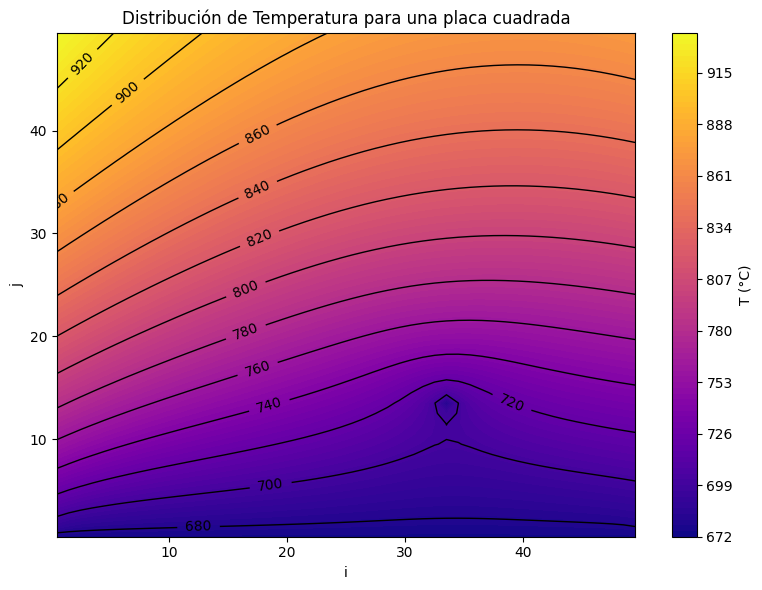


Muestra más cercana por temperatura media promedio en índice: 22825
Temperatura mínima: 57.31 °C
Temperatura máxima: 1137.86 °C
Temperatura media: 541.12 °C
Temperatura std: 251.16 °C

Condiciones de borde y material de la muestra:


material     Incoloy
k               12.0
T_fusion      1390.0
T_hp          57.306
i_hp              25
j_hp              22
tipo_A           flu
tipo_B          temp
tipo_C          temp
tipo_D          temp
valor_A    -7699.977
valor_B      220.539
valor_C      277.416
valor_D      915.241
Name: 22825, dtype: object

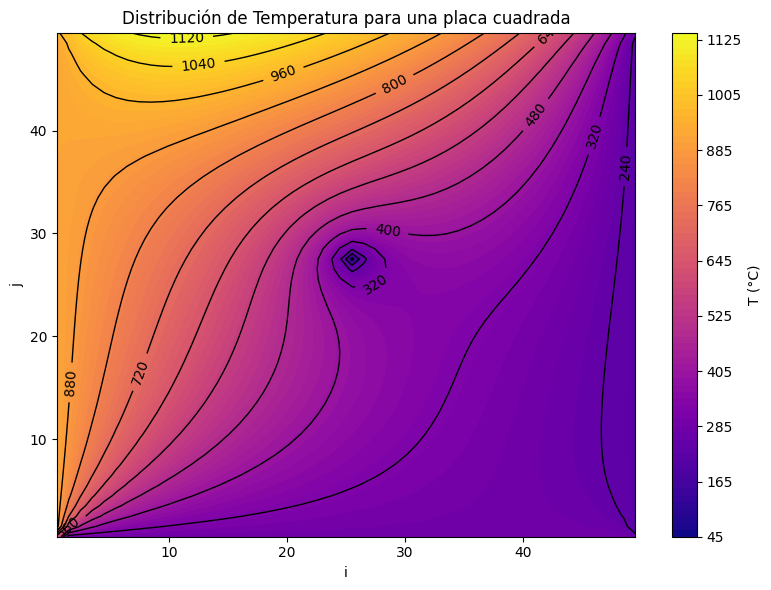


Muestra más cercana por temperatura std promedio en índice: 5916
Temperatura mínima: 1.43 °C
Temperatura máxima: 631.25 °C
Temperatura media: 342.53 °C
Temperatura std: 162.95 °C

Condiciones de borde y material de la muestra:


material    Magnesium
k               157.0
T_fusion        650.0
T_hp          316.521
i_hp               43
j_hp               45
tipo_A            flu
tipo_B           temp
tipo_C           temp
tipo_D            flu
valor_A     -1576.111
valor_B       630.752
valor_C         1.435
valor_D     -5982.962
Name: 5916, dtype: object

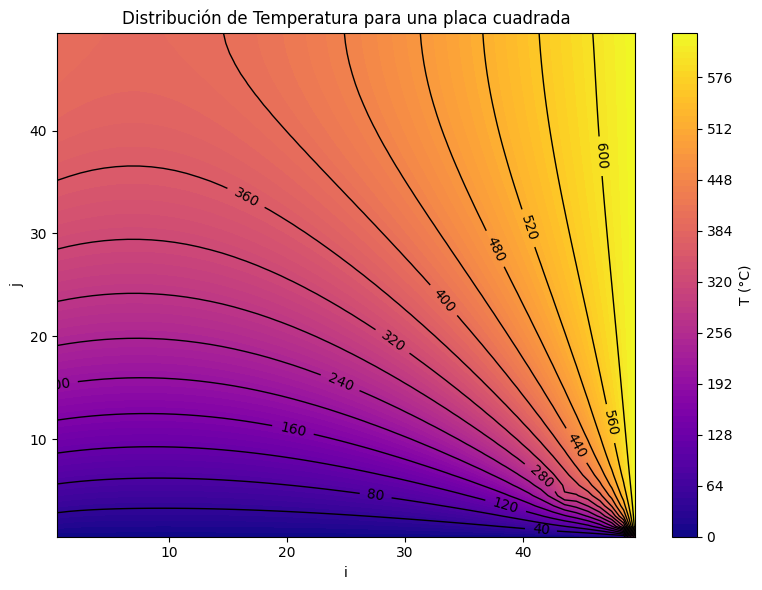

In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
from utils import graficarChapa
import matplotlib.pyplot as plt

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

# Rutas de los archivos
folder_name = 'dataset_50000_test'  # cambiar según el dataset a inspeccionar
Y_path = BASE_DIR.parent / 'data' / folder_name / 'Y.npy'
csv_path = BASE_DIR.parent / 'data' / folder_name / 'dataset_variables.csv'

# ---------------- CARGA DE DATOS ----------------
Y_data = np.load(Y_path).astype(np.float32)  # shape (n_samples, 2500)
df_registros = pd.read_csv(csv_path, sep=';')

# ---------------- HISTOGRAMA GENERAL ----------------
Y_flat = Y_data.flatten()

plt.figure(figsize=(10,5))
plt.hist(Y_flat, bins=500, color='steelblue', edgecolor='blue')
plt.title(f"Distribución de temperaturas en {folder_name}")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Estadísticas generales de {folder_name}:")
print(f"Temperatura mínima: {Y_flat.min():.2f} °C")
print(f"Temperatura máxima: {Y_flat.max():.2f} °C")
print(f"Temperatura media: {Y_flat.mean():.2f} °C")
print(f"Temperatura std: {Y_flat.std():.2f} °C")

# ---------------- CÁLCULO DE ESTADÍSTICOS POR MUESTRA ----------------
mins = Y_data.min(axis=1)
maxs = Y_data.max(axis=1)
means = Y_data.mean(axis=1)
stds = Y_data.std(axis=1)

# ---------------- SELECCIÓN AUTOMÁTICA DE OBJETIVOS ----------------
target_min = mins.mean()
target_max = maxs.mean()
target_mean = means.mean()
target_std = stds.mean()

print("\nMostrando muestras más cercanas a los valores promedio del dataset:")

# Encontrar índices más cercanos
idx_min_closest = np.argmin(np.abs(mins - target_min))
idx_max_closest = np.argmin(np.abs(maxs - target_max))
idx_mean_closest = np.argmin(np.abs(means - target_mean))
idx_std_closest = np.argmin(np.abs(stds - target_std))

# Función auxiliar para mostrar información
def mostrar_info(idx, descripcion):
    print(f"\n{descripcion} en índice: {idx}")
    print(f"Temperatura mínima: {mins[idx]:.2f} °C")
    print(f"Temperatura máxima: {maxs[idx]:.2f} °C")
    print(f"Temperatura media: {means[idx]:.2f} °C")
    print(f"Temperatura std: {stds[idx]:.2f} °C")

    print("\nCondiciones de borde y material de la muestra:")
    display(df_registros.iloc[idx])

    Y_sample = Y_data[idx].reshape(50, 50)
    graficarChapa(Y_sample, 50, 50)

# Mostrar cada muestra más cercana
mostrar_info(idx_min_closest, "Muestra más cercana por temperatura mínima promedio")
mostrar_info(idx_max_closest, "Muestra más cercana por temperatura máxima promedio")
mostrar_info(idx_mean_closest, "Muestra más cercana por temperatura media promedio")
mostrar_info(idx_std_closest, "Muestra más cercana por temperatura std promedio")


Columnas disponibles en el CSV:
Index(['Material', 'Tipo ', 'k [W/m·K]', 'T [°C]', 'Fusión [°C] (aprox)'], dtype='object')


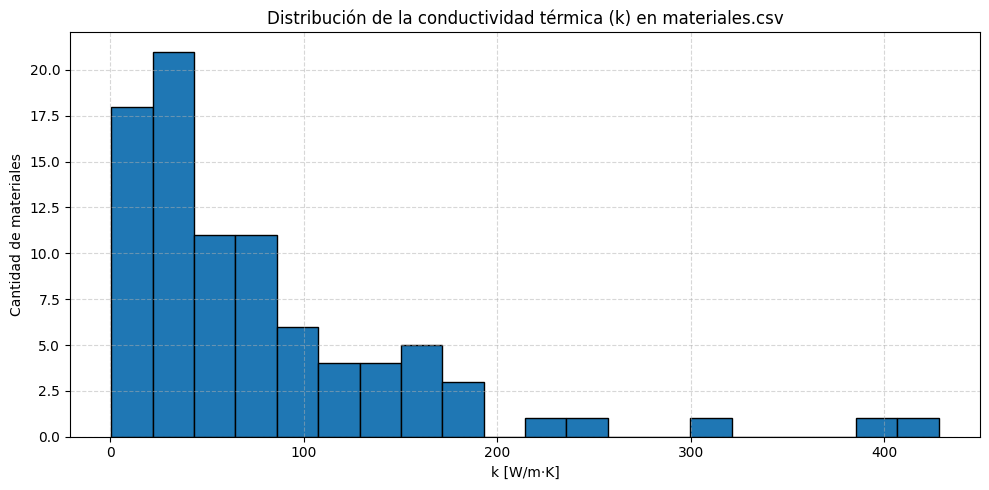

Valor mínimo de k: 0.52 W/m·K
Valor máximo de k: 428.00 W/m·K
Valor medio de k: 78.21 W/m·K
Desvío estándar de k: 80.15 W/m·K


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

csv_path = BASE_DIR.parent / 'data' / 'materiales.csv'

df_materiales = pd.read_csv(csv_path, sep=';')

# ---------------- INSPECCIÓN DE COLUMNAS ----------------
print("Columnas disponibles en el CSV:")
print(df_materiales.columns)

# ---------------- GRAFICAR HISTOGRAMA DE k ----------------
columna_k = 'k [W/m·K]'

plt.figure(figsize=(10,5))
plt.hist(df_materiales[columna_k], bins=20, edgecolor='black')
plt.title("Distribución de la conductividad térmica (k) en materiales.csv")
plt.xlabel("k [W/m·K]")
plt.ylabel("Cantidad de materiales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------- MOSTRAR ESTADÍSTICAS ----------------
print(f"Valor mínimo de k: {df_materiales[columna_k].min():.2f} W/m·K")
print(f"Valor máximo de k: {df_materiales[columna_k].max():.2f} W/m·K")
print(f"Valor medio de k: {df_materiales[columna_k].mean():.2f} W/m·K")
print(f"Desvío estándar de k: {df_materiales[columna_k].std():.2f} W/m·K")
